Before you turn this in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Introduction to Linear Regression

Linear Regression is a fundamental method in data science for modeling the relationship between one (or more) explanatory variables (features) and a scalar response (target). In its simplest form (simple linear regression), it assumes:

$$y = \beta_0 + \beta_1 x + \varepsilon$$

where $x$ is the independent variable, $y$ is the dependent variable (target), $\beta_0$ is the intercept, $\beta_1$ is the slope, and $\varepsilon$ is the error term.

In practice, we often use libraries (e.g., **scikit-learn** in Python) to fit linear models, but it's valuable to understand how to compute the slope and intercept coefficients manually using basic statistics. In the following notebook:

1. We'll demonstrate how to generate some synthetic linear data.
2. Provide exercises to implement linear regression calculations and evaluate the model.
3. Show how to fit a linear regression model using **scikit-learn**.
4. Demonstrate how to perform **bootstrapping** to estimate confidence intervals for the slope and intercept.

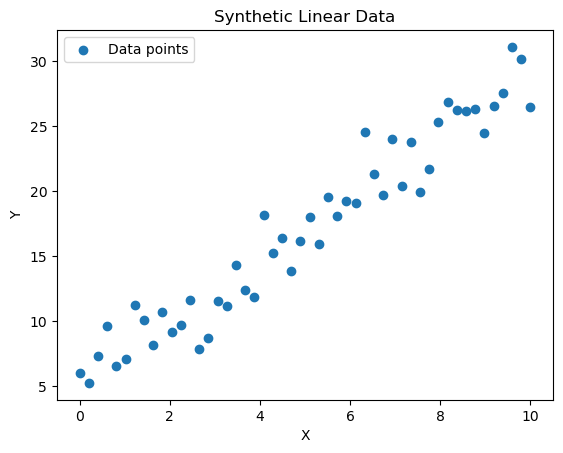

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate synthetic linear data for demonstration.
# y = 2.5 * x + 5 + some noise
np.random.seed(42)
X_demo = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, len(X_demo))
Y_demo = 2.5 * X_demo + 5 + noise

plt.scatter(X_demo, Y_demo, label='Data points')
plt.title('Synthetic Linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Exercise 1: Calculate Slope and Intercept Manually

For a given dataset $(X, Y)$, the slope ($m$) and intercept ($b$) for simple linear regression can be computed using:

$$m = \frac{\mathrm{Cov}(X, Y)}{\mathrm{Var}(X)}, \quad b = \bar{Y} - m\,\bar{X}$$

where
- $\bar{X}$ is the mean of $X$
- $\bar{Y}$ is the mean of $Y$
- $\mathrm{Cov}(X, Y) = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$
- $\mathrm{Var}(X) = \frac{1}{n}\sum_{i=1}^n (X_i - \bar{X})^2$

**Task**: Implement the function `manual_linear_regression(X, Y)` that returns `(m, b)`, where
- `m` is the slope
- `b` is the intercept

Use the following code cell to implement your answer.

In [3]:
# YOUR CODE HERE
def manual_linear_regression(X, Y):

    X = np.array(X)
    Y = np.array(Y)

    #means
    Xmean = np.mean(X)
    Ymean = np.mean(Y)


    #not sure if this accounts for 1/n 
    numerator = np.sum((X - Xmean) * (Y - Ymean))

    denominator = np.sum(X - Xmean ** 2)

    m = numerator/denominator
    b = Ymean - m * Xmean

    return m, b

Slope (m): -0.5
Intercept (b): 6.3
Predicted Y for X=6: 3.3


## Exercise 2: Using scikit-learn's LinearRegression

In this exercise, we'll use **scikit-learn**'s `LinearRegression` to fit the same kind of model we discussed above.

**Task**: Write a function `sklearn_linear_regression(X, Y)` that:

1. Reshapes $X$ appropriately if needed (since scikit-learn expects a 2D array for features).
2. Creates and fits a `LinearRegression` model using $X$ and $Y$.
3. Returns the slope (`model.coef_[0]`) and intercept (`model.intercept_`).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercise 3: Mean Squared Error (MSE)

Once you have a regression line, you often want to measure how well it fits the data. The **mean squared error (MSE)** is defined by:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2$$

where $\hat{y}_i$ is the predicted value for the $i$-th data point and $y_i$ is the true value.

Write a function `compute_mse(X, Y, m, b)` that:
1. Takes arrays of data points `X, Y` and a slope-intercept pair `m, b`.
2. Predicts $\hat{y}_i = m X_i + b$.
3. Returns the MSE.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Exercise 4: Bootstrapping for Linear Regression

Bootstrapping is a **resampling** technique that allows us to estimate the variability of our model parameters (e.g., slope and intercept) without relying heavily on strict theoretical assumptions. The idea is:

1. **Sample with replacement** from our dataset $(X, Y)$ to create a "bootstrapped" dataset of the same size.
2. **Fit** a linear regression model (manually or with scikit-learn) to each resampled dataset.
3. **Record** the parameters (slope, intercept) for each fit.
4. **Repeat** many times (e.g., 1000 bootstrap samples).
5. **Analyze** the distribution of your fitted slopes and intercepts (e.g., compute confidence intervals).

**Task**: Implement a function `bootstrap_regression(X, Y, n_boot=1000)` that:
1. Takes arrays `X, Y` and the number of bootstrap iterations `n_boot` (default 1000).
2. For each iteration:
   - Creates a random sample (with replacement) of the same length as `X` and `Y`.
   - Fits a linear regression (you can use your `manual_linear_regression` function **or** scikit-learn).
   - Stores the slope and intercept.
3. Returns two arrays/lists: `(slopes, intercepts)` each of length `n_boot`.

We'll use this information to compute approximate confidence intervals for slope and intercept. The hidden tests will run checks on your function to verify correctness.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Part 2: Visualizing the Bootstrap Distributions

In this section, **visualize** the distribution of slopes and intercepts produced by the bootstrapping procedure. We'll use the synthetic dataset (`X_demo`, `Y_demo`) and the `bootstrap_regression` function you defined above:

1. Draw bootstrap samples and compute the slope and intercept for each.
2. Display histograms for the slopes and intercepts.
3. Show the approximate means and a possible confidence interval.

In [ ]:
# Part 2 - Visualization (demonstration)
n_boot = 1000
slopes_demo, intercepts_demo = bootstrap_regression(X_demo, Y_demo, n_boot=n_boot)

mean_slope = np.mean(slopes_demo)
mean_intercept = np.mean(intercepts_demo)

# Compute 95% confidence interval (2.5th and 97.5th percentiles)
ci_slope = np.percentile(slopes_demo, [2.5, 97.5])
ci_intercept = np.percentile(intercepts_demo, [2.5, 97.5])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(slopes_demo, bins=30, alpha=0.7, color='C0')
axes[0].axvline(mean_slope, color='red', linestyle='--', label=f'Mean = {mean_slope:.2f}')
axes[0].axvspan(ci_slope[0], ci_slope[1], color='red', alpha=0.2,
                label=f'95% CI = [{ci_slope[0]:.2f}, {ci_slope[1]:.2f}]')
axes[0].set_title('Bootstrap Slopes')
axes[0].set_xlabel('Slope')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(intercepts_demo, bins=30, alpha=0.7, color='C1')
axes[1].axvline(mean_intercept, color='red', linestyle='--', label=f'Mean = {mean_intercept:.2f}')
axes[1].axvspan(ci_intercept[0], ci_intercept[1], color='red', alpha=0.2,
                label=f'95% CI = [{ci_intercept[0]:.2f}, {ci_intercept[1]:.2f}]')
axes[1].set_title('Bootstrap Intercepts')
axes[1].set_xlabel('Intercept')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Mean slope:", round(mean_slope, 3), "| 95% CI:", ci_slope)
print("Mean intercept:", round(mean_intercept, 3), "| 95% CI:", ci_intercept)
